# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataset

In [ ]:
data=k=pd.read_csv("/content/winequality-red.csv")
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# Describing dataset

In [ ]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1596.000000       1596.000000  1596.000000     1596.000000   
mean        8.314160          0.527954     0.270276        2.535558   
std         1.732203          0.179176     0.193894        1.405515   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.600000          1.580000     0.790000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1596.000000          1596.000000           1596.000000  1596.000000   
mean      0.087120            15.858396             46.382206     0.996744   
std       0.045251            10.460554             32.839138     0.001888   
min       0.012000             1.000000         

# Checking for missing values

In [ ]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1591          False             False        False           False      False   
1592          False             False        False           False      False   
1593          False             False        False           False      False   
1594          False             False        False           False      False   
1595          False             False        Fa

# Number of values for each quality

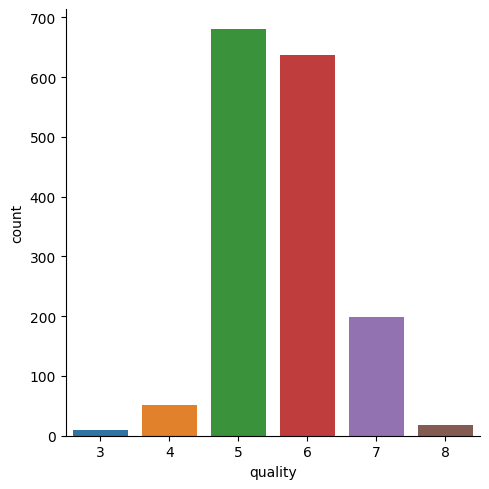

In [ ]:
sns.catplot(x="quality",data=data,kind="count")

## Histogram for features

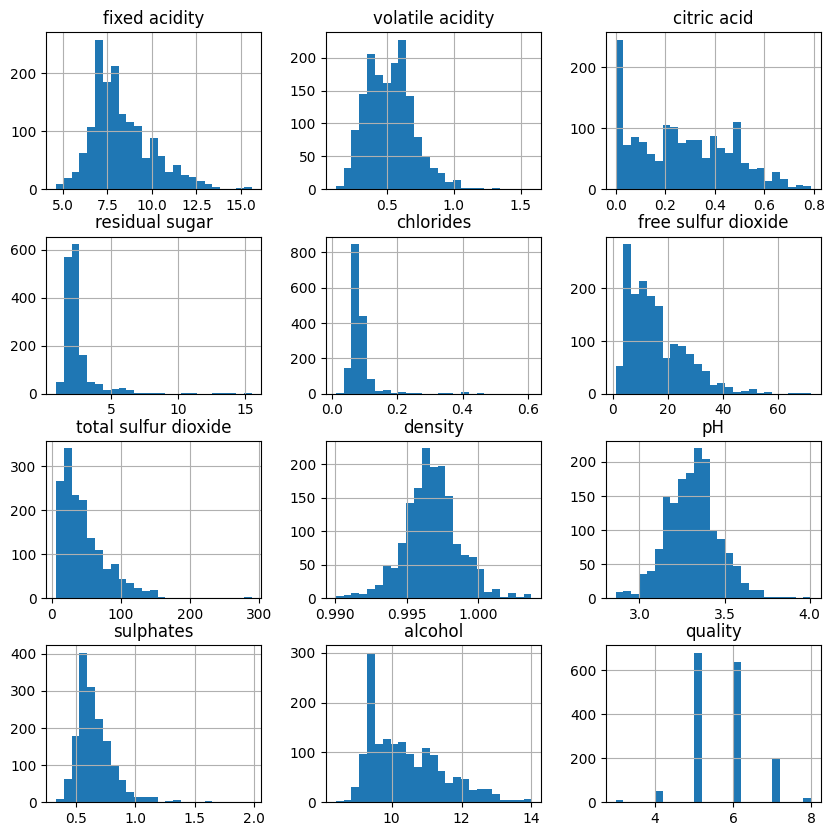

In [ ]:
data.hist(bins=25,figsize=[10,10])
plt.show()

# Constructing the heatmap to determine the correlation between the features

<Axes: >

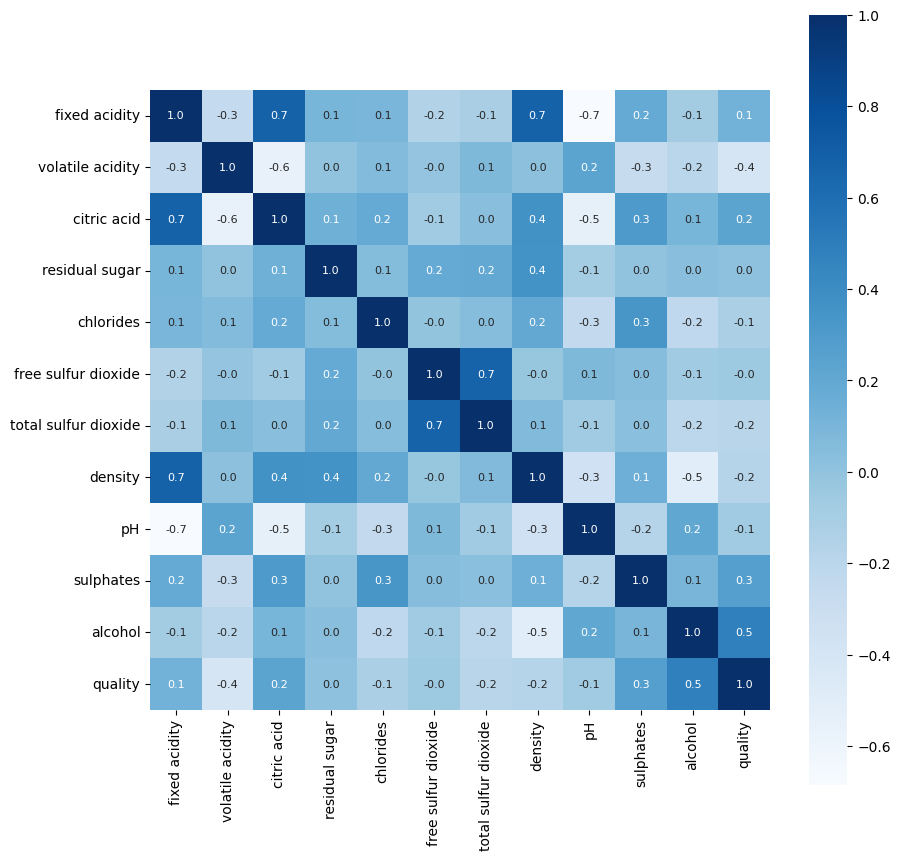

In [ ]:
correlation=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

# Dependent and Independent variable

In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
print(x)
print(y)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[5 5 5 ... 6 5 6]


# Train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Using Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# Providing test data

In [ ]:
test_data=lr.predict(x_test)
print(test_data)

[5.75640581 5.79909738 5.27967879 6.05304862 5.48129959 5.36057263
 5.32876535 6.05090235 6.13159049 5.62399088 6.28406568 5.80588516
 5.26877333 5.20163581 5.63525988 5.38961879 5.19762526 4.92645348
 5.00618162 5.29294354 5.55056547 5.34756253 5.9888292  5.29019703
 5.35474412 5.33020027 6.12934923 5.97352013 5.15444183 6.28221193
 6.13364285 5.83875334 5.87769552 5.47860225 5.51214076 5.15666752
 6.75731641 5.46434832 5.43159654 4.94546077 5.67690939 5.29704716
 5.61832264 5.25474576 5.858205   5.41543661 5.16306424 5.14132643
 4.37519192 6.41987334 5.53726616 5.57529442 4.90206279 5.32210886
 5.74753878 4.98869588 6.59310506 5.19096782 5.15510727 5.85019585
 5.45089001 5.30180405 6.39207731 5.23196019 5.24946603 5.08354646
 5.26877333 5.80860181 6.0602973  5.24140731 5.66862959 5.81686122
 6.3013837  5.92247744 5.32397716 5.11698732 5.31760377 5.27120818
 6.28923678 5.80913702 5.16011241 5.78555855 5.71724536 4.50576603
 6.55915499 5.7147219  5.06197082 5.57529442 5.59043909 5.1538

# Calculation Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse=mean_squared_error(y_test,test_data)
sqr=np.sqrt(mse)
rs=r2_score(y_test,test_data)
mae=mean_absolute_error(y_test,test_data)
print("Root mean squared error : ",sqr)
print("R_squared score : ",rs)
print("mean absolute error : ",mae)

Root mean squared error :  0.6630607109116144
R_squared score :  0.33824125103684155
mean absolute error :  0.5253656874691618


# Visualizing the distribution of difference between actual and predicted values

<ipython-input-43-f01d53263287>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([y_test-test_data],bins=50)


<Axes: ylabel='Density'>

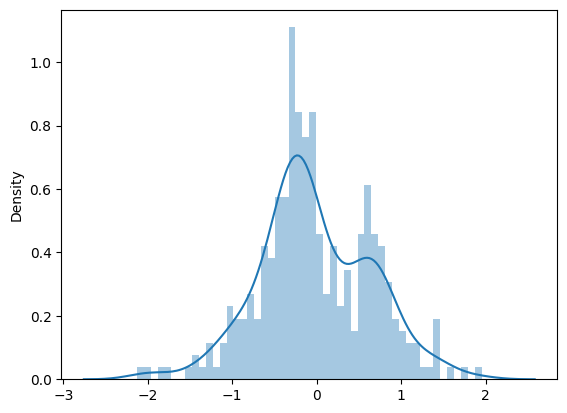

In [ ]:
sns.distplot([y_test-test_data],bins=50)